In [1]:
import numpy as np
from model import BoolFeature, FloatFeature, IntFeature, Model
from print import *
from tibercad import run_tibercad
from util import calc_fitness, calc_fitness_parts, print_mutations_table
from genetic import oneplusone, semo

In [2]:
features = {
    # Solarcell
    "pedot_density": IntFeature(9e1, (1, 1e5), 1e15),
    # Add `enabled=False` as a last parameter of the constructor to disable feature
    # from mutation, e.g.:
    # "pedot_density": IntFeature(9e1, (1, 1e5), 1e15, enabled=False)
    # All features are enabled by default
    "fullerene_density": IntFeature(1e2, (1, 1e5), 1e15),
    "perovskite_C": FloatFeature(2e-8, (1e-10, 1e-4)),
    "perovskite_surf_C": FloatFeature(2e-6, (1e-10, 1e-4)),
    "perovskite_tau_n": FloatFeature(2e-8, (1e-10, 1e-6)),
    "perovskite_tau_p": FloatFeature(2e-8, (1e-10, 1e-6)),
    "perovskite_surf_tau_n": FloatFeature(1e-10, (1e-11, 1e-6)),
    "perovskite_surf_tau_p": FloatFeature(1e-10, (1e-11, 1e-6)),
    "pedot_tau_n": FloatFeature(1e-6, (1e-8, 1e-5)),
    "pedot_tau_p": FloatFeature(1e-6, (1e-8, 1e-5)),
    "fullerene_tau_n": FloatFeature(1e-6, (1e-8, 1e-5)),
    "fullerene_tau_p": FloatFeature(1e-6, (1e-8, 1e-5)),
    "generation": FloatFeature(1.6771203876494165, (1, 2), 1e21),
    "cathode_barrier_lowering": BoolFeature(True),
    "cathode_work_function": FloatFeature(4.2, (3.8, 4.6)),
    "anode_barrier_lowering": BoolFeature(True),
    "anode_work_function": FloatFeature(4.88, (4.6, 5.2)),
    # C60
    "C60_E_v": FloatFeature(-6.0, (-6.3, -5.8)),
    "C60_Eg_G": FloatFeature(2.15, (1.8, 2.2)),
    "C60_mu_max_0": FloatFeature(1.6, (0.001, 20)),
    "C60_mu_max_1": FloatFeature(1.6, (0.001, 20)),
    # FAPbBr2I
    "FAPbBr2I_E_v": FloatFeature(-5.7, (-5.8, -5.4)),
    "FAPbBr2I_Eg_G": FloatFeature(1.97, (1.95, 2.05)),
    "FAPbBr2I_permitivity": FloatFeature(6, (3.5, 7)),
    "FAPbBr2I_mu_max_0": FloatFeature(2, (0.001, 20)),
    "FAPbBr2I_mu_max_1": FloatFeature(2, (0.001, 20)),
    # C60
    "pedot_E_v": FloatFeature(-5.2, (-5.4, -5.0)),
    "pedot_Eg_G": FloatFeature(1.6, (1.5, 2)),
    "pedot_mu_max_0": FloatFeature(0.45, (0.001, 20)),
    "pedot_mu_max_1": FloatFeature(0.45, (0.001, 20)),
}

In [3]:
target_v_oc = 0.903
target_j_sc = 11.482 / 1e3
target_ff = 67.572 / 100
target_fitness = calc_fitness(target_v_oc, target_j_sc, target_ff)
target_values = (target_v_oc, target_j_sc, target_ff)

In [4]:
model = Model(features)

In [5]:
np.random.seed(322)

In [6]:
res_front = semo(model, target_values)

cad in /home/roman/work/itmo/master/seed322/epoch145_ind0
Epoch 145, hypervolume = 7.976601278838095
Front updated, new front size: 19, new front fitnesses:
[0.001783, 0.068787, 0.002166], [0.131907, 0.059013, 0.038324], [0.176471, 0.003825, 0.027707], [0.001783, 0.063722, 0.007971], [0.154189, 0.060432, 0.013171], [0.109626, 0.05963, 0.045479], [0.176471, 0.008807, 0.002133], [0.131907, 0.058944, 0.038637], [0.087344, 0.060665, 0.03937], [0.087344, 0.060446, 0.040486], [0.001783, 0.057608, 0.100094], [0.131907, 0.000164, 0.053283], [0.020499, 0.051604, 0.124758], [0.131907, 0.000295, 0.050668], [0.087344, 0.060905, 0.000209], [0.001783, 0.06292, 0.013023], [0.154189, 0.002173, 0.027747], [0.001783, 0.057553, 0.143332], [0.198752, 0.00525, 0.010825]
mutate 'perovskite_surf_tau_p'
old value '1e-10'
new value '1.5007150032906606e-07'
running tibercad in /home/roman/work/itmo/master/seed322/epoch146_ind0
Epoch 146, hypervolume = 7.976601278838095
mutate 'cathode_work_function'
old value '

In [14]:
print_mutations_table(res_front, "mutations.txt")

In [10]:
for i, res in enumerate(res_front):
    print_model(res, f"./result-{i}")

In [15]:
import matplotlib.pyplot as plt

In [20]:
def parse_target_file(filepath):
    contents = open(filepath, 'r').readlines()[3:]
    x = []
    y = []
    for line in contents:
        values = line.split()
        x.append(float(values[0]))
        y.append(-float(values[3]) / 1e3)
    return x, y

def parse_model_result(model):
    x = []
    y = []
    if model.result is None:
        return x, y
    for line in model.result:
        if line[0] != '#':
            res = [float(x) for x in line.strip().split()]
            x.append(res[0])
            y.append(res[1])
    return x, y

In [44]:
target_x, target_y = parse_target_file("b4_14_rev.txt")
model_0_x, model_0_y = parse_model_result(res_front[0])

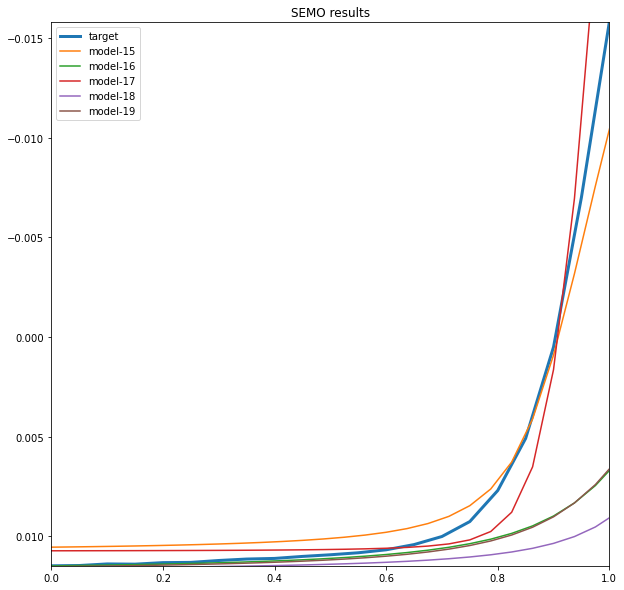

In [71]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,10)
ax.plot(target_x, target_y, label='target', linewidth=3.0, zorder=0)
for i, model in enumerate(res_front[15:20]):
    x, y = parse_model_result(model)
    ax.plot(x, y, label=f'model-{15 + i}')
ax.set_title("SEMO results")
ax.set_xlim(target_x[-1], target_x[0])
ax.set_ylim(target_y[-1], target_y[0])
ax.legend()